Importing data from file

#importing data
import pandas as p

In [1]:
import re
# read file
text = open('dataset-1.txt', 'r', encoding='utf-8').read()
text = text.replace('\r\n', '\n').replace('\r', '\n')
# text = re.sub(r'(\n\s*\n)+', ' . . . . . ', text) # replace multiple newlines with ' . . . . . '
text = re.sub(r'[-]+', ' ', text) # replace hyphens with space
text = re.sub(r'[^a-zA-Z0-9 \.\n]', '', text) # remove special characters except period
text = re.sub(r'\n\n', ' <EOS> ', text) # replace newlines with space
text = re.sub(r'\.+', '.', text).strip() # collapse multiple spaces into one
text = re.sub(r'\.', ' . ', text) # surround periods with spaces
text = re.sub(r'\s+', ' ', text).strip() # collapse multiple spaces into one
text = text.lower() # convert to lowercase
text = text[:len(text)]  # use only last 90% of the text

In [2]:
window_size = 4

paragraphs = text.split(' <eos> ')
# words = [word for para in paragraphs for word in para.split() + ['<EOS>']]
words = []
for para in paragraphs:
    words.extend(para.split(' ') + ['<PAD>'] * window_size)

In [ ]:
words
# paragraphs

['well',
 'prince',
 'so',
 'genoa',
 'and',
 'lucca',
 'are',
 'now',
 'just',
 'family',
 'estates',
 'of',
 'the',
 'buonapartes',
 '.',
 'but',
 'i',
 'warn',
 'you',
 'if',
 'you',
 'dont',
 'tell',
 'me',
 'that',
 'this',
 'means',
 'war',
 'if',
 'you',
 'still',
 'try',
 'to',
 'defend',
 'the',
 'infamies',
 'and',
 'horrors',
 'perpetrated',
 'by',
 'that',
 'antichrist',
 'i',
 'really',
 'believe',
 'he',
 'is',
 'antichrist',
 'i',
 'will',
 'have',
 'nothing',
 'more',
 'to',
 'do',
 'with',
 'you',
 'and',
 'you',
 'are',
 'no',
 'longer',
 'my',
 'friend',
 'no',
 'longer',
 'my',
 'faithful',
 'slave',
 'as',
 'you',
 'call',
 'yourself',
 'but',
 'how',
 'do',
 'you',
 'do',
 'i',
 'see',
 'i',
 'have',
 'frightened',
 'you',
 'sit',
 'down',
 'and',
 'tell',
 'me',
 'all',
 'the',
 'news',
 '.',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 'it',
 'was',
 'in',
 'july',
 '1805',
 'and',
 'the',
 'speaker',
 'was',
 'the',
 'well',
 'known',
 'anna',
 'pavlovna',
 'schere

In [4]:
window_size = 4

X, Y = [], []
for i in range(len(words)):
    start_idx = max(0, i - window_size)
    context = words[start_idx:i]
    context = ['<PAD>'] * (window_size - len(context)) + context  # left padding
    target = words[i]
    
    X.append(context)
    Y.append(target)


for i in range(100):
    print(' '.join(X[i]), '--->', Y[i])


<PAD> <PAD> <PAD> <PAD> ---> well
<PAD> <PAD> <PAD> well ---> prince
<PAD> <PAD> well prince ---> so
<PAD> well prince so ---> genoa
well prince so genoa ---> and
prince so genoa and ---> lucca
so genoa and lucca ---> are
genoa and lucca are ---> now
and lucca are now ---> just
lucca are now just ---> family
are now just family ---> estates
now just family estates ---> of
just family estates of ---> the
family estates of the ---> buonapartes
estates of the buonapartes ---> .
of the buonapartes . ---> but
the buonapartes . but ---> i
buonapartes . but i ---> warn
. but i warn ---> you
but i warn you ---> if
i warn you if ---> you
warn you if you ---> dont
you if you dont ---> tell
if you dont tell ---> me
you dont tell me ---> that
dont tell me that ---> this
tell me that this ---> means
me that this means ---> war
that this means war ---> if
this means war if ---> you
means war if you ---> still
war if you still ---> try
if you still try ---> to
you still try to ---> defend
still try t

In [5]:
from collections import Counter

word_counts = Counter(words)
vocab = sorted(word_counts.keys()) 
vocab_size = len(vocab)

print("Vocabulary Size:", vocab_size)

Vocabulary Size: 17843


In [ ]:
most_common_10 = word_counts.most_common(10)
least_common_10 = word_counts.most_common()[-10:]

print("10 Most Frequent Words:", most_common_10)
print("10 Least Frequent Words:", least_common_10)


10 Most Frequent Words: [('<PAD>', 45352), ('the', 34544), ('.', 26661), ('and', 22226), ('to', 16675), ('of', 14888), ('a', 10546), ('he', 9869), ('in', 8978), ('his', 7984)]
10 Least Frequent Words: [('subverting', 1), ('provokes', 1), ('firmament', 1), ('joshua', 1), ('nun', 1), ('uninvited', 1), ('strengthens', 1), ('immovability', 1), ('earths', 1), ('unreal', 1)]


In [7]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using NVIDIA GPU (CUDA)


In [8]:
stoi = {word: i for i, word in enumerate(vocab)}
itos = {i: word for word, i in stoi.items()}
emb_dim = 64
emb = torch.nn.Embedding(len(stoi), emb_dim)
print(stoi)
print(itos)

{'.': 0, '1': 1, '10': 2, '100': 3, '10000': 4, '100000': 5, '102': 6, '11': 7, '110': 8, '120': 9, '130': 10, '13th': 11, '140': 12, '15': 13, '150': 14, '15000': 15, '150000': 16, '154': 17, '15y': 18, '160': 19, '160000': 20, '17': 21, '178': 22, '1789': 23, '1797': 24, '17th': 25, '18': 26, '1805': 27, '1806': 28, '1807': 29, '1808': 30, '1809': 31, '1810': 32, '1811': 33, '1812': 34, '1813': 35, '1815': 36, '1820': 37, '18th': 38, '1st': 39, '2': 40, '20': 41, '217': 42, '22': 43, '22nd': 44, '23': 45, '23rd': 46, '24': 47, '24th': 48, '25': 49, '25th': 50, '26': 51, '27': 52, '27th': 53, '3': 54, '30': 55, '30000': 56, '31': 57, '3rd': 58, '4': 59, '40': 60, '4th': 61, '4x': 62, '5': 63, '50': 64, '6': 65, '60': 66, '62': 67, '666': 68, '671': 69, '6th': 70, '7': 71, '70': 72, '700': 73, '70000': 74, '7th': 75, '8': 76, '80': 77, '800': 78, '80000': 79, '86th': 80, '8th': 81, '9': 82, '90': 83, '9th': 84, '<PAD>': 85, '<eos>': 86, 'a': 87, 'aah': 88, 'ab': 89, 'aback': 90, 'abacu

In [9]:
print(emb.weight.shape)  # should be (vocab_size, emb_dim)

torch.Size([17843, 64])


In [10]:
X_encoded = [[stoi[word] for word in seq] for seq in X]
Y_encoded = [stoi[word] for word in Y] 

In [11]:
print(X_encoded[:5])

[[85, 85, 85, 85], [85, 85, 85, 17376], [85, 85, 17376, 12031], [85, 17376, 12031, 14549], [17376, 12031, 14549, 6765]]


In [12]:
stoi['<PAD>']

85

In [13]:
X = torch.tensor(X_encoded, dtype=torch.long).to(device)
Y = torch.tensor(Y_encoded, dtype=torch.long).to(device)

In [14]:
emb.weight

Parameter containing:
tensor([[-0.3548, -0.7874,  0.5729,  ...,  1.3850,  0.4733,  1.0812],
        [-0.3592,  0.1695,  0.3316,  ..., -1.8602, -1.9003, -0.6335],
        [ 0.4731,  1.6700, -0.8691,  ..., -1.2197,  0.3228, -0.1421],
        ...,
        [ 1.0456,  0.1158, -1.0282,  ..., -0.4781, -0.3886,  0.7695],
        [ 1.3214, -1.1295,  1.5931,  ..., -0.5802,  0.5094,  0.1685],
        [-0.3393,  1.0060, -0.1326,  ..., -0.1634, -1.0417, -0.1208]],
       requires_grad=True)

In [15]:
emb.weight.shape

torch.Size([17843, 64])

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [17]:
class Nextword(nn.Module):
    def __init__(self, block_size, vocab_size, emb_dim=64, hidden_size=1024):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(block_size * emb_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        # x: (batch, block_size)
        x = self.emb(x)                           # (batch, block_size, emb_dim)
        x = x.view(x.shape[0], -1)                # flatten
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)                           # logits
        return x



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
train_data = torch.utils.data.TensorDataset(X_train, Y_train)
val_data = torch.utils.data.TensorDataset(X_val, Y_val)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32)



In [19]:
import time
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def print_model_summary(model):
    print("Model Summary:")
    for name, module in model.named_modules():
        if len(list(module.children())) == 0:
            params = sum(p.numel() for p in module.parameters())
            print(f"{name:<20} {params:,} parameters")
    print(f"\nTotal trainable parameters: {count_params(model):,}\n")


import torch
import torch.nn as nn
import time

def train_model(model, X, Y, X_val, Y_val, epochs=500, batch_size=1024, lr=1e-3, wd=1e-4, print_every=100):
    """Train the MLP model using AdamW optimizer."""
    model.train()
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    loss_fn = nn.CrossEntropyLoss()

    losses, times, val_losses = [], [], []

    for epoch in range(epochs):
        start = time.time()
        total_loss, n_batches = 0, 0

        # -------- Training --------
        for i in range(0, X.shape[0], batch_size):
            x_batch = X[i:i+batch_size]
            y_batch = Y[i:i+batch_size]

            logits = model(x_batch)
            loss = loss_fn(logits, y_batch)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()
            n_batches += 1

        avg_loss = total_loss / n_batches
        losses.append(avg_loss)
        times.append(time.time() - start)

        # -------- Validation --------
        model.eval()
        val_total_loss, val_batches = 0, 0
        with torch.no_grad():
            for i in range(0, X_val.shape[0], batch_size):
                x_batch = X_val[i:i+batch_size]
                y_batch = Y_val[i:i+batch_size]

                logits = model(x_batch)
                loss = loss_fn(logits, y_batch)
                val_total_loss += loss.item()
                val_batches += 1

        avg_val_loss = val_total_loss / val_batches
        val_losses.append(avg_val_loss)
        model.train()

        # -------- Logging --------
        if epoch % print_every == 0:
            print(f"Epoch {epoch:4d} | Train Loss: {avg_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Time: {times[-1]:.2f}s")

    return losses, times, val_losses


In [20]:
# Create enhanced model and show before training
block_size = 4
model = Nextword(block_size, len(stoi), emb_dim, hidden_size=64).to(device)
model = torch.compile(model)

## Model parameters:
print_model_summary(model)


Model Summary:
_orig_mod.emb        1,141,952 parameters
_orig_mod.fc1        16,448 parameters
_orig_mod.fc2        4,160 parameters
_orig_mod.fc3        1,159,795 parameters

Total trainable parameters: 2,322,355



In [21]:
import torch

def generate_text(model, stoi, itos, block_size, device, start_context=None, max_len=20):
    """
    Generate a sequence of words from a trained model.

    Args:
        model: Trained PyTorch language model
        stoi: dict, mapping from word → index
        itos: dict, mapping from index → word
        block_size: int, context size expected by the model
        device: torch device ('cuda' or 'cpu')
        start_context: list of str (optional), seed words
        max_len: int, number of words to generate

    Returns:
        str: Generated text sequence
    """

    model.eval()  # evaluation mode (no dropout, etc.)

    # --- Initialize context ---
    if start_context is None:
        context = [stoi['<PAD>']] * block_size  # start with padding
    else:
        # convert words → indices, pad or truncate to block_size
        context = [stoi.get(w, 0) for w in start_context][-block_size:]
        context = [stoi['<PAD>']] * (block_size - len(context)) + context

    generated_words = []

    # --- Generate words one by one ---
    with torch.no_grad():
        for _ in range(max_len):
            x = torch.tensor(context).view(1, -1).to(device)
            y_pred = model(x)  # logits for next word
            ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
            word = itos[ix]

            # stop at end token 
            # if word == eos:
            #     break

            generated_words.append(word)

            # slide the context window forward
            context = context[1:] + [ix]

    model.train()  # restore training mode

    return ' '.join(generated_words)


In [22]:
text = generate_text(model, stoi, itos, block_size=4, device=device)
print(text)

descent rapped floors barbarism deign sums blamelessly middle dhonneur descendants coeur pistols anyway vanquish deacons prevailed possibly chill consider abramovna


In [23]:
losses, timing , val_losses = train_model(model, X_train, Y_train,X_val,Y_val, epochs=1000, batch_size=1024, lr=1e-3, wd=1e-4, print_every=100)

Epoch    0 | Train Loss: 6.4067 | Val Loss: 5.8699 | Time: 3.33s
Epoch  100 | Train Loss: 3.2456 | Val Loss: 6.1976 | Time: 2.90s
Epoch  200 | Train Loss: 2.9653 | Val Loss: 6.8431 | Time: 2.90s
Epoch  300 | Train Loss: 2.8724 | Val Loss: 7.2077 | Time: 2.90s
Epoch  400 | Train Loss: 2.8259 | Val Loss: 7.4502 | Time: 2.89s
Epoch  500 | Train Loss: 2.7965 | Val Loss: 7.6259 | Time: 2.89s
Epoch  600 | Train Loss: 2.7758 | Val Loss: 7.7707 | Time: 2.89s
Epoch  700 | Train Loss: 2.7611 | Val Loss: 7.8835 | Time: 2.90s
Epoch  800 | Train Loss: 2.7480 | Val Loss: 7.9774 | Time: 2.89s
Epoch  900 | Train Loss: 2.7379 | Val Loss: 8.0598 | Time: 2.89s


In [ ]:
text = generate_text(model, stoi, itos, block_size=4, device=device, start_context="maid of honor and favorite", max_len=50)
print(text)

whatever seat was not a former peasant rows of warfare . <PAD> <PAD> <PAD> <PAD> in the village so much that night but denisov promised to recognize something the onlookers felt that wives and joylessly him less histories just belonging to europe even helene in other life around him her


In [25]:
import pandas as pd
df = pd.DataFrame({
    'Epoch': range(1, len(losses) + 1),
    'Train_Loss': losses,
    'Val_Loss': val_losses,
    'Timing': timing
})
df.to_csv('training_log.csv', index=False)



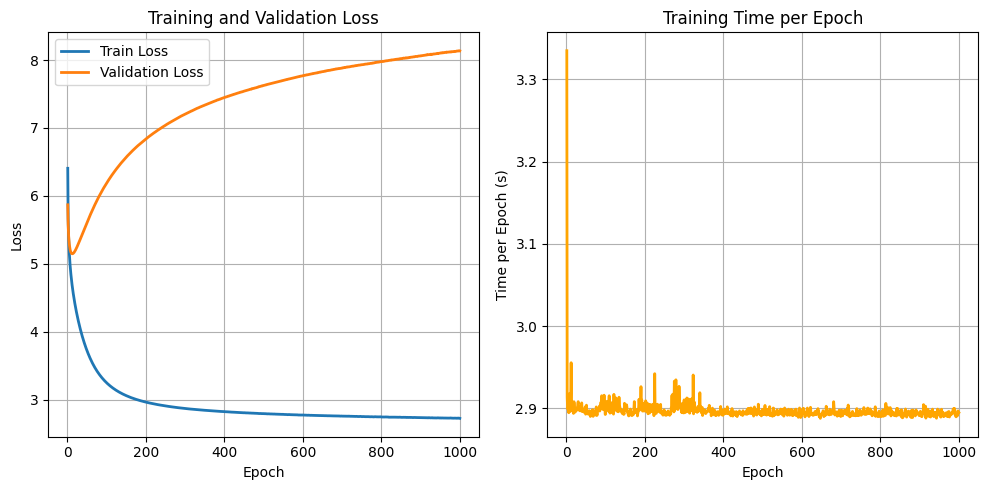

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Train_Loss'], label='Train Loss', linewidth=2)
plt.plot(df['Epoch'], df['Val_Loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Timing curve
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Timing'], color='orange', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Time per Epoch (s)')
plt.title('Training Time per Epoch')
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
torch.save(model.state_dict(), 'nextword-model-lightning.pth')